In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

### Old

Test for luminosity computing with tables from Burrows, 1997, data retreived in logarithmic scale converted into linear scale.

In [ ]:
table_1MJ=pd.read_csv(r'/Users/emauduit/Documents/These/target_selection/Programmes/1MJ.csv', delimiter=';')
table_5MJ=pd.read_csv(r'/Users/emauduit/Documents/These/target_selection/Programmes/5MJ.csv', delimiter=';')
table_10MJ=pd.read_csv(r'/Users/emauduit/Documents/These/target_selection/Programmes/10MJ.csv', delimiter=';')

table_10MJ.info()
#t=np.array(10**table_10MJ['log(t) (Gyr)'])
#L=np.array(10**table_10MJ['log(L/Ls)'])
#R=np.array(table_10MJ['R(10^9 cm)']*1e7)

#table_10MJ_lin=pd.DataFrame({'t_Gyr' : t, 'L_Ls' : L, 'R_m' : R})

#table_10MJ_lin.to_csv('10MJ.csv', sep=';')


Curvefit of L/Ls(t) and R(t), to better estimate the value of L. --> not working

In [ ]:
def fit_luminosity(x,a,b):
    return(a*np.power(x,b))

popt1, pcov1 = curve_fit(fit_luminosity,table_1MJ['t_Gyr'], table_1MJ['L_Ls'],p0=[95,-1.12])
popt5, pcov5 = curve_fit(fit_luminosity,table_5MJ['t_Gyr'], table_5MJ['L_Ls'],p0=[5200,-1.19])
popt10, pcov10 = curve_fit(fit_luminosity,table_10MJ['t_Gyr'], table_10MJ['L_Ls'],p0=[34500,-1.2])

print(popt1)
print(pcov1)

In [ ]:
plt.figure()
plt.plot(table_1MJ['t_Gyr'],table_1MJ['L_Ls'],'+-', label='1MJ')
plt.plot(table_5MJ['t_Gyr'],table_1MJ['L_Ls'], '+-', label='5MJ')
plt.plot(table_10MJ['t_Gyr'],table_10MJ['L_Ls'], '+-', label='10MJ')
plt.plot(table_1MJ['t_Gyr'],fit_luminosity(table_1MJ['t_Gyr'],*popt1),'--')
plt.plot(table_5MJ['t_Gyr'],fit_luminosity(table_5MJ['t_Gyr'],*popt5),'--')
plt.plot(table_10MJ['t_Gyr'],fit_luminosity(table_10MJ['t_Gyr'],*popt10),'--')
plt.xlabel('t [Gyr]')
plt.ylabel('L/L_s')
plt.xscale('log')
plt.yscale('log')
plt.title("Evolution de la luminosité en fonction de l'âge de la planète")
plt.grid()
plt.legend()
plt.show()

plt.figure()
plt.plot(table_1MJ['t_Gyr'],table_1MJ['R_m'],'+', label='1MJ')
plt.plot(table_5MJ['t_Gyr'],table_1MJ['R_m'],'+', label='5MJ')
plt.plot(table_10MJ['t_Gyr'],table_10MJ['R_m'],'+', label='10MJ')
plt.xlabel('t [Gyr]')
plt.ylabel('R [m]')
#plt.xscale('log')
#plt.yscale('log')
plt.title("Evolution du rayon en fonction de l'âge de la planète")
plt.grid()
plt.legend()
plt.show()


In [ ]:
LJ_norm=jup.calculate_luminosity(sol.age,table_1MJ,table_5MJ, table_10MJ)
jup.affiche()

### New

In [3]:
table1=pd.read_csv(r"/Users/emauduit/Documents/These/Selection des cibles/Programmes/1MJ_log.csv",delimiter=';')
table2=pd.read_csv(r"/Users/emauduit/Documents/These/Selection des cibles/Programmes/5MJ_log.csv",delimiter=';')
table3=pd.read_csv(r"/Users/emauduit/Documents/These/Selection des cibles/Programmes/10MJ_log.csv",delimiter=';')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/emauduit/Documents/These/Selection des cibles/Programmes/1MJ_log.csv'

In [3]:
ages=np.log10(np.linspace(0.001,10,10000))
L1=[] ; L2=[] ; L3=[]
for i in range(10000):
    L1.append(np.interp(ages[i],table1['log(t) (Gyr)'],table1['log(L/Ls)']))
    L2.append(np.interp(ages[i],table2['log(t) (Gyr)'],table2['log(L/Ls)']))
    L3.append(np.interp(ages[i],table3['log(t) (Gyr)'],table3['log(L/Ls)']))

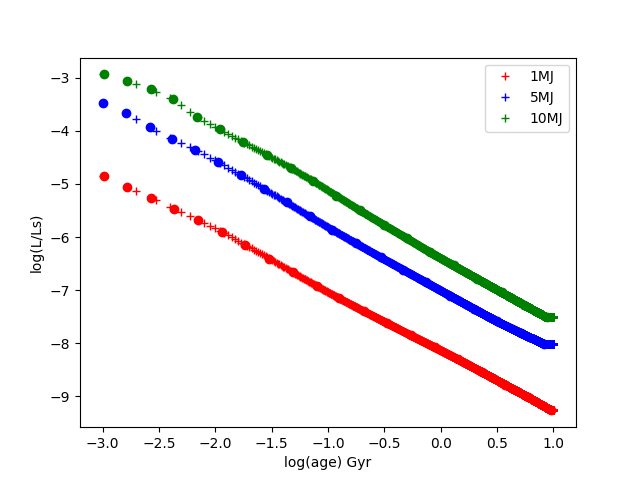

In [18]:
plt.figure()
plt.scatter(table1['log(t) (Gyr)'],table1['log(L/Ls)'],color='red')
plt.plot(ages,L1, 'r+',label='1MJ')
plt.scatter(table2['log(t) (Gyr)'],table2['log(L/Ls)'],color='blue')
plt.plot(ages,L2, 'b+', label='5MJ')
plt.scatter(table3['log(t) (Gyr)'],table3['log(L/Ls)'],color='green')
plt.plot(ages,L3, 'g+', label='10MJ')
plt.xlabel('log(age) Gyr')
plt.ylabel('log(L/Ls)')
plt.legend()
plt.show()




In [13]:
masses=np.log10(np.linspace(0.001,10,10000))
masses_log=np.log10([1.0,5.0,10.0])
L_mass=np.zeros(shape=(20,10000))
for i in range(20):
    for j in range(10000):
        L_mass[i][j]=np.interp(masses[j],masses_log,[table1['log(L/Ls)'][i],table2['log(L/Ls)'][i],table3['log(L/Ls)'][i]])

        

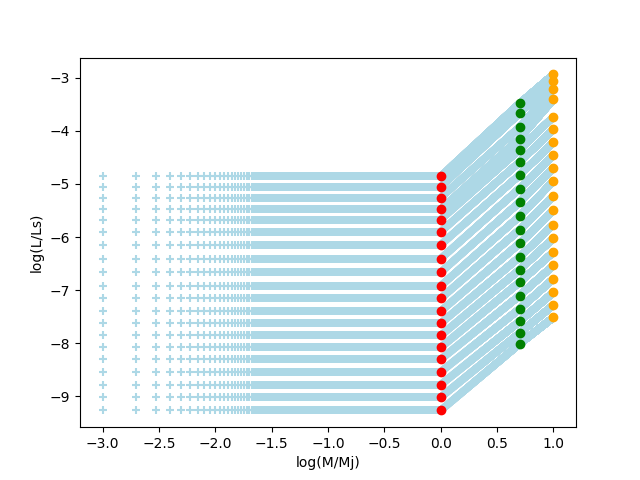

In [17]:
plt.figure()
for i in range(20):
    plt.scatter(masses,L_mass[i][:], marker='+',color='lightblue')
    #,label='log(t)= {:.3}'.format(table1['log(t) (Gyr)'][i]))

plt.scatter(np.log10(1.)*np.ones(20),table1['log(L/Ls)'], color='red',label='1MJ')
plt.scatter(np.log10(5.)*np.ones(20),table2['log(L/Ls)'], color='green',label='5MJ')
plt.scatter(np.log10(10.)*np.ones(20),table3['log(L/Ls)'], color='orange',label='10MJ')
plt.xlabel('log(M/Mj)')
plt.ylabel('log(L/Ls)')
plt.show()